# EDA REPORT - SHOT PREDICTION IN BASKETBALL

Professional basketball is a data-rich field that provides a wealth of information for analysis and forecasting. In order to find trends and insights about shot outcomes, this report examines a large dataset that spans five NBA seasons. Our EDA aims to investigate a wide range of variables, from player and team identifiers to the spatial dynamics of shots, with a primary focus on the predictive aspect of shots made.

With shot locations specified and player and team information annotated, the dataset offers a detailed look at individual shot attempts. It has temporal components as well, capturing the precise times during games when shots were made. With the help of this multimodal approach, we are able to comprehend not only the binary result of shot attempts but also the context in which they take place, providing new opportunities for advanced predictive modeling.

We aim to establish a basis for additional analysis by means of statistical summaries and visualizations, which may aid in the creation of models capable of highly accurate shot outcome prediction. This report, which provides a descriptive overview of the dataset and highlights important variables that may have an impact on shot success in the high-stakes world of professional basketball, serves as the first step in that endeavor.



### Import Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

### Read Files

In [3]:
years = [2019, 2020, 2021, 2022, 2023]
dfs = {'combined': pd.DataFrame()}  # Initialize a combined DataFrame

for year in years:
    file_path = f"data/NBA_{year}_Shots.csv"
    try:
        df = pd.read_csv(file_path)
        dfs[year] = df  # Store the DataFrame in the dictionary
        dfs['combined'] = pd.concat([dfs['combined'], df], ignore_index=True)  # Update the combined DataFrame
    except FileNotFoundError:
        print(f"The file 'NBA_{year}_Shots.csv' for {year} does not exist.")


# To select a specific year (e.g., 2020), you can access it like this:
df2019 = dfs[2019]
df2020 = dfs[2020]
df2021 = dfs[2021]
df2022 = dfs[2022]
df2023 = dfs[2023]

# To select the combined data, you can access it like this:
dfcombined = dfs['combined']


### Dataset Overview

Get a general overview on the dataframe with 26 columns and 1,032,499 rows. There are a lot of categorical columns and some numerical columns, as well as one boolean.

In [4]:
#Check the first few rows of the combined dataset to get an initial understanding of the data structure
dfcombined.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2019,2018-19,1610612762,Utah Jazz,1628960,Grayson Allen,G,SG,04-10-2019,21801229,...,Right Corner 3,Right Side,R,24+ ft.,-22.2,12.15,23,5,0,18
1,2019,2018-19,1610612746,LA Clippers,1627820,Tyrone Wallace,G,PG,04-10-2019,21801229,...,In The Paint (Non-RA),Center,C,8-16 ft.,-2.3,16.85,11,5,0,27
2,2019,2018-19,1610612737,Atlanta Hawks,1627752,Taurean Prince,F,SF,04-10-2019,21801220,...,Above the Break 3,Center,C,24+ ft.,0.4,37.25,32,4,0,2
3,2019,2018-19,1610612762,Utah Jazz,1628513,Naz Mitrou-Long,G,SG,04-10-2019,21801229,...,Restricted Area,Center,C,Less Than 8 ft.,-1.3,7.05,2,5,0,46
4,2019,2018-19,1610612746,LA Clippers,203210,JaMychal Green,F,PF,04-10-2019,21801229,...,Above the Break 3,Right Side Center,RC,24+ ft.,-19.1,20.75,24,5,0,55


In [5]:
dfcombined.shape

(1032499, 26)

In [6]:
#Explore the data types and null values: combined_df.info()
dfcombined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032499 entries, 0 to 1032498
Data columns (total 26 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   SEASON_1        1032499 non-null  int64  
 1   SEASON_2        1032499 non-null  object 
 2   TEAM_ID         1032499 non-null  int64  
 3   TEAM_NAME       1032499 non-null  object 
 4   PLAYER_ID       1032499 non-null  int64  
 5   PLAYER_NAME     1032499 non-null  object 
 6   POSITION_GROUP  1027194 non-null  object 
 7   POSITION        1027194 non-null  object 
 8   GAME_DATE       1032499 non-null  object 
 9   GAME_ID         1032499 non-null  int64  
 10  HOME_TEAM       1032499 non-null  object 
 11  AWAY_TEAM       1032499 non-null  object 
 12  EVENT_TYPE      1032499 non-null  object 
 13  SHOT_MADE       1032499 non-null  bool   
 14  ACTION_TYPE     1032499 non-null  object 
 15  SHOT_TYPE       1032499 non-null  object 
 16  BASIC_ZONE      1032499 non-null  ob

In [7]:
dfcombined.columns

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'],
      dtype='object')

The dataset includes 26 columns:
- SEASON_1: Identifier for the NBA season.
- SEASON_2: Years when the NBA season is taking place.
- TEAM_ID: Unique numerical identifier for the NBA team.
- TEAM_NAME: Full name of the NBA team.
- PLAYER_ID: Unique numerical identifier for the NBA player.
- PLAYER_NAME: Full name of the NBA player.
- POSITION_GROUP: General group of positions to which the player's position belongs.
- POSITION: Specific playing position of the NBA player.
- GAME_DATE: Date when the game took place.
- GAME_ID: Unique identifier for the specific game.
- HOME_TEAM: Identifier of the home team for the game.
- AWAY_TEAM: Identifier of the away team for the game.
- EVENT_TYPE: Type of event during the game (made or missed shot).
- SHOT_MADE: Binary indicator whether the shot was made (1) or missed (0).
- ACTION_TYPE: The type of action that led to the shot (e.g., jump shot, layup).
- SHOT_TYPE: The type of shot attempted (e.g., two-pointer, three-pointer).
- BASIC_ZONE: General area of the court where the shot was taken.
- ZONE_NAME: More specific name of the zone on the court where the shot was taken.
- ZONE_ABB: Abbreviation for the specific zone on the court where the shot was taken.
- ZONE_RANGE: Distance range category for the shot taken (e.g., close range, perimeter).
- LOC_X: Horizontal location coordinate on the court where the shot was taken.
- LOC_Y: Vertical location coordinate on the court where the shot was taken.
- SHOT_DISTANCE: Measured distance from the basket where the shot was taken.
- QUARTER: The quarter of the game during which the shot was taken.
- MINS_LEFT: Minutes remaining in the quarter when the shot was taken.
- SECS_LEFT: Seconds remaining in the quarter when the shot was taken.

### Missing Values

In [8]:
# Checking for missing values
missing_values = dfcombined.isnull().sum()

missing_values


SEASON_1             0
SEASON_2             0
TEAM_ID              0
TEAM_NAME            0
PLAYER_ID            0
PLAYER_NAME          0
POSITION_GROUP    5305
POSITION          5305
GAME_DATE            0
GAME_ID              0
HOME_TEAM            0
AWAY_TEAM            0
EVENT_TYPE           0
SHOT_MADE            0
ACTION_TYPE          0
SHOT_TYPE            0
BASIC_ZONE           0
ZONE_NAME            0
ZONE_ABB             0
ZONE_RANGE           0
LOC_X                0
LOC_Y                0
SHOT_DISTANCE        0
QUARTER              0
MINS_LEFT            0
SECS_LEFT            0
dtype: int64

In [9]:
# Handling missing values: Check the percentage of missing values in 'POSITION_GROUP' and 'POSITION'
missing_values_percentage = dfcombined[['POSITION_GROUP', 'POSITION']].isnull().mean() * 100

# Output the percentage of missing values
missing_values_percentage

POSITION_GROUP    0.513802
POSITION          0.513802
dtype: float64

The POSITION_GROUP and POSITION columns have 5305 missing values in the dataset which is approximately 0.51%. Since the percentage of missing values is quite small, we can consider to drop them in further data preprocessing steps.

### Target variable SHOT_MADE

/var/folders/d6/z61r6yys6pbf_1c70ts6gmfm0000gn/T/ipykernel_2462/3091133235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfcombined, x='SHOT_MADE', palette = "Blues_d")


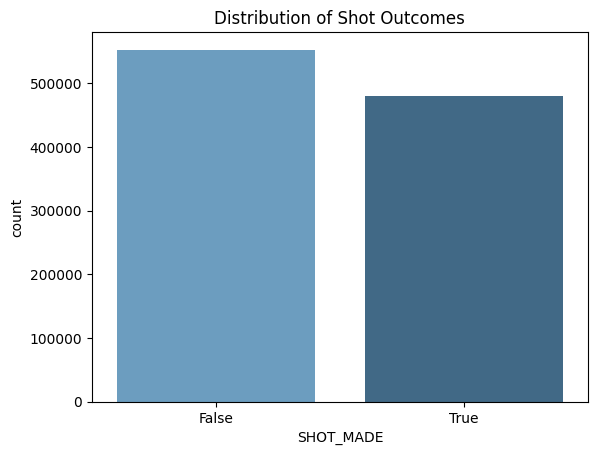

In [10]:
# Visualize the distribution of shot outcomes
sns.countplot(data=dfcombined, x='SHOT_MADE', palette = "Blues_d")
plt.title('Distribution of Shot Outcomes')
plt.show()

The distribution of shot outcomes indicates that approximately 53.53% of shots were missed (False) and 46.47% were made (True). This suggests a relatively balanced dataset regarding the target variable, which is beneficial for modeling purposes, as it reduces the likelihood of a model being biased towards one outcome.

### Breaking down the numerical variables

#### LOC_X and LOC_Y

LOC_X and LOC_Y show different scalings throughout the year. This makes it hard to compare the different years, which is why in the following the values are being normalized to scale LOC_X and LOC_Y to the scale of a basketball court. 

In [11]:
# Normalization function to scale LOC_X and LOC_Y values
def normalize_coordinates(dataframe, new_x_range=(-25, 25), new_y_range=(0, 94)):
    """
    This function normalizes LOC_X and LOC_Y values to a given range.
    The new_x_range and new_y_range parameters define the desired output range for LOC_X and LOC_Y.
    """
    x_min, x_max = new_x_range
    y_min, y_max = new_y_range
    
    # Normalize LOC_X
    x_range = dataframe['LOC_X'].max() - dataframe['LOC_X'].min()
    dataframe['NORM_LOC_X'] = ((dataframe['LOC_X'] - dataframe['LOC_X'].min()) / x_range) * (x_max - x_min) + x_min
    
    # Normalize LOC_Y
    y_range = dataframe['LOC_Y'].max() - dataframe['LOC_Y'].min()
    dataframe['NORM_LOC_Y'] = ((dataframe['LOC_Y'] - dataframe['LOC_Y'].min()) / y_range) * (y_max - y_min) + y_min
    
    return dataframe

# Now we will group by 'SEASON_1' and normalize within each season
df_list = []
for season, group in dfcombined.groupby('SEASON_1'):
    normalized_group = normalize_coordinates(group)
    df_list.append(normalized_group)

# Concatenate all the normalized groups back into a single dataframe
dfcombined_norm = pd.concat(df_list)

# Verify normalization by checking the range of values for the first season
dfcombined_norm[dfcombined_norm['SEASON_1'] == 2019][['NORM_LOC_X', 'NORM_LOC_Y']].agg(['min', 'max'])

,NORM_LOC_X,NORM_LOC_Y
min,-25.0,0.0
max,25.0,94.0


In [12]:
# Analyzing 'LOC_X' and 'LOC_Y' in more depth

# Descriptive statistics for 'LOC_X' and 'LOC_Y'
loc_descriptive_stats = dfcombined_norm[['NORM_LOC_X', 'NORM_LOC_Y']].describe()

loc_descriptive_stats

,NORM_LOC_X,NORM_LOC_Y
count,1.032499e+06,1.032499e+06
mean,-3.684707e-02,1.510475e+01
std,1.118560e+01,9.919149e+00
min,-2.500000e+01,0.000000e+00
25%,-4.659319e+00,6.511732e+00
50%,0.000000e+00,1.094450e+01
75%,4.518072e+00,2.415642e+01
max,2.500000e+01,9.400000e+01


The descriptive statistics for LOC_X and LOC_Y are as follows:

- LOC_X has a mean very close to 0, which makes sense since the court is symmetrical, and shots are taken from both sides.
- LOC_Y has a positive mean, indicating that shots are taken from a range of distances from the basket, with the majority being closer than the three-point line.
- The standard deviation for both LOC_X and LOC_Y shows that there is a wide spread of shot locations across the court.
- The minimum and maximum values for LOC_X are within a typical range for an NBA court, while the maximum for LOC_Y indicates some very long shots.

With X and Y coordinates it is possible to plot the different zones on a basketball chart to identify patterns and understand the different zones better.

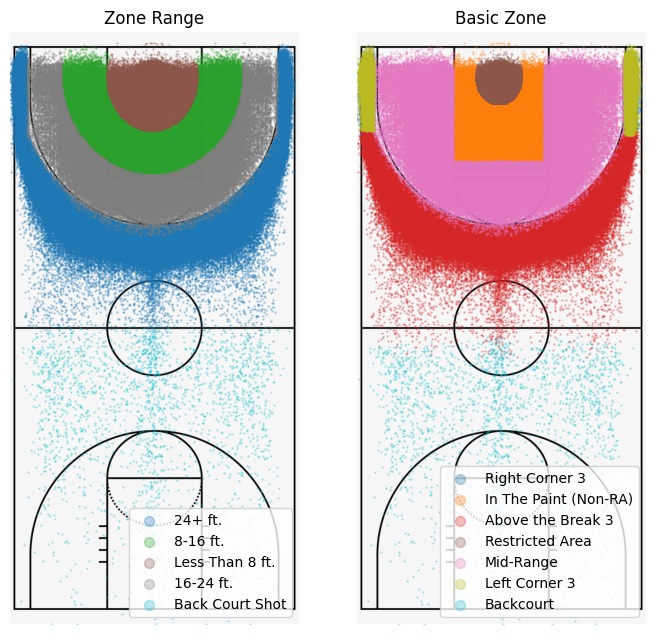

In [14]:
# define path of the court image
court_img = plt.imread('court_image.jpeg')

# Define the dimensions of the basketball court in feet
court_width_feet = 50  # Width of a standard NBA basketball court in feet
court_length_feet = 94  # Length of a standard NBA basketball court in feet

# The dimensions of the image in pixels
image_width_px = 820
image_height_px = 1680

# The new scale factors should map the normalized coordinate ranges to the image dimensions
scale_x = (image_width_px-15) / court_width_feet
scale_y = (image_height_px-30) / court_length_feet

# Apply the new scale factors to the normalized shot locations for the 2019 season
dfcombined_norm['IMG_LOC_X'] = (dfcombined_norm['NORM_LOC_X'] + court_width_feet / 2) * scale_x
dfcombined_norm['IMG_LOC_Y'] = (court_length_feet - dfcombined_norm['NORM_LOC_Y']) * scale_y

# Create figure with 3 subplots in a row
fig, axs = plt.subplots(1, 2, figsize=(image_width_px / 100, image_height_px / 100))

# Define zone categories for each subplot
zone_categories = ['ZONE_RANGE', 'BASIC_ZONE']
titles = ['Zone Range', 'Basic Zone']

# Display and plot for each subplot
for ax, zone_category, title in zip(axs, zone_categories, titles):
    # Display the placeholder court image
    ax.imshow(court_img, extent=[0, image_width_px, 0, image_height_px])
    
    # Create a colormap based on the number of unique zones
    unique_zones = dfcombined_norm[zone_category].unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_zones)))

    # Plot the shots, automatically assigning a color to each zone
    for i, zone in enumerate(unique_zones):
        zone_shots = dfcombined_norm[dfcombined_norm[zone_category] == zone]
        ax.scatter(zone_shots['IMG_LOC_X'], zone_shots['IMG_LOC_Y'],
                   c=[colors[i]], label=zone, alpha=0.3, s=0.5)
    
    # Add a legend and title for each subplot
    ax.legend(loc='lower right', markerscale=10)
    ax.set_title(title)
    ax.set_axis_off()

plt.show()  # Display the plot

# drop the Image columns, as it is not needed for further analysis
dfcombined_norm = dfcombined_norm.drop(["IMG_LOC_X", "IMG_LOC_Y"], axis=1)


Overall, these shot charts suggest a modern basketball approach that emphasizes efficiency, with a focus on three-pointers and shots at the rim, which are generally considered the most efficient shots in basketball. The relative scarcity of mid-range shots could also imply an analytical approach to shot selection.

#### Shot Distance

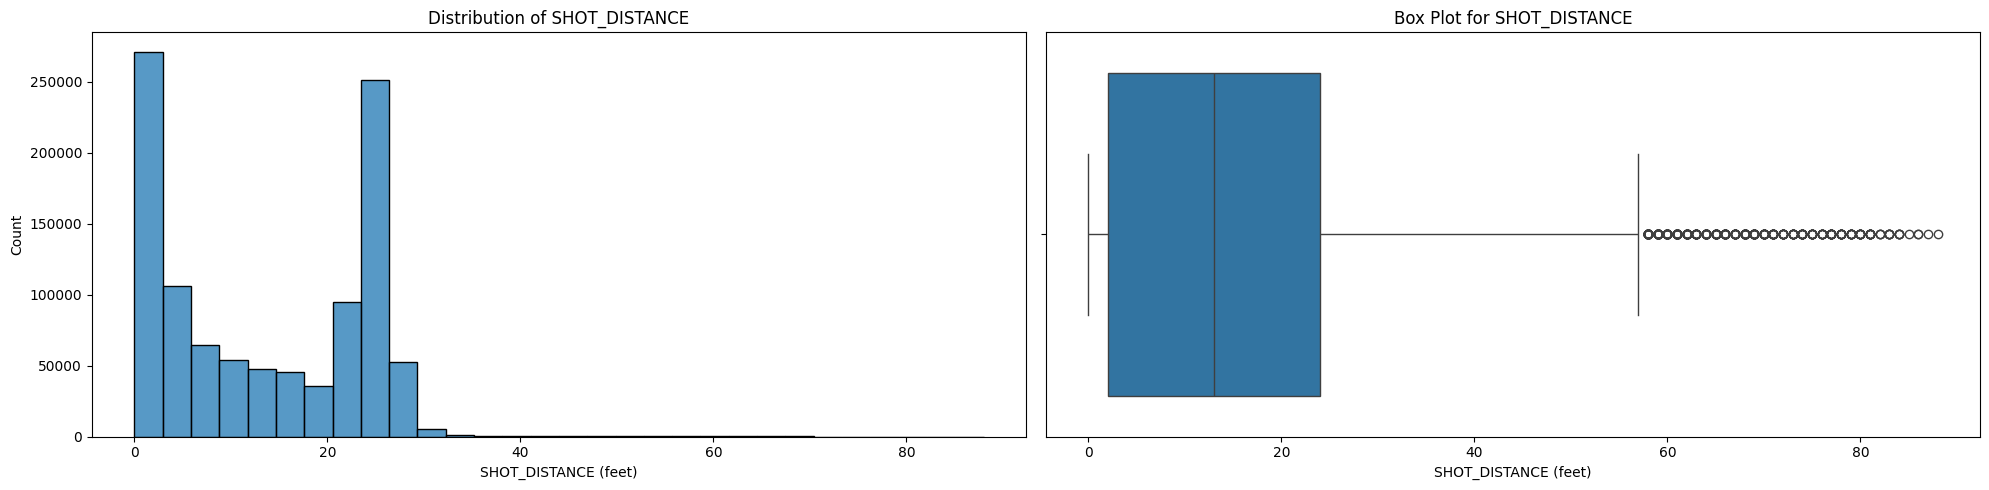

count    1.032499e+06
mean     1.346666e+01
std      1.058196e+01
min      0.000000e+00
25%      2.000000e+00
50%      1.300000e+01
75%      2.400000e+01
max      8.800000e+01
Name: SHOT_DISTANCE, dtype: float64

In [15]:
# Analyzing 'SHOT_DISTANCE' in more depth

# Descriptive statistics for 'SHOT_DISTANCE'
shot_distance_descriptive_stats = dfcombined['SHOT_DISTANCE'].describe()

# We can use plt.subplots to create a figure with two subplots side by side.
fig, axes = plt.subplots(1 ,2, figsize=(20, 5))

# Distribution plot of 'SHOT_DISTANCE' on the first subplot
sns.histplot(dfcombined['SHOT_DISTANCE'], bins=30, kde=False, ax=axes[0])
axes[0].set_title('Distribution of SHOT_DISTANCE')
axes[0].set_xlabel('SHOT_DISTANCE (feet)')
axes[0].set_ylabel('Count')

# Box plot to identify outliers in 'SHOT_DISTANCE' on the second subplot
sns.boxplot(x=dfcombined['SHOT_DISTANCE'], ax=axes[1])
axes[1].set_title('Box Plot for SHOT_DISTANCE')
axes[1].set_xlabel('SHOT_DISTANCE (feet)')

# Display the plots next to each other
plt.tight_layout()
plt.show()


shot_distance_descriptive_stats


- The histogram shows that shot distances are heavily concentrated at the lower end, with a steep decline as distance increases. This is expected as most shots in basketball are taken closer to the basket.
- The box plot does not show any extreme outliers, which suggests that most shot distances are within a reasonable range for basketball shots. However, there is a long tail towards the higher distances, indicating that long shots are less frequent but still within the realm of normal play.

- The mean shot distance is approximately 13.5 feet, with a standard deviation of about 10.6 feet. This large standard deviation indicates a wide variety of shot distances.
- The median shot distance is 13 feet, which is slightly less than the mean, suggesting a slight skew in the distribution toward longer shots.
- The maximum shot distance recorded is 88 feet, which is an exceptionally long shot, likely attempted at the end of a quarter or game.

#### Time related features

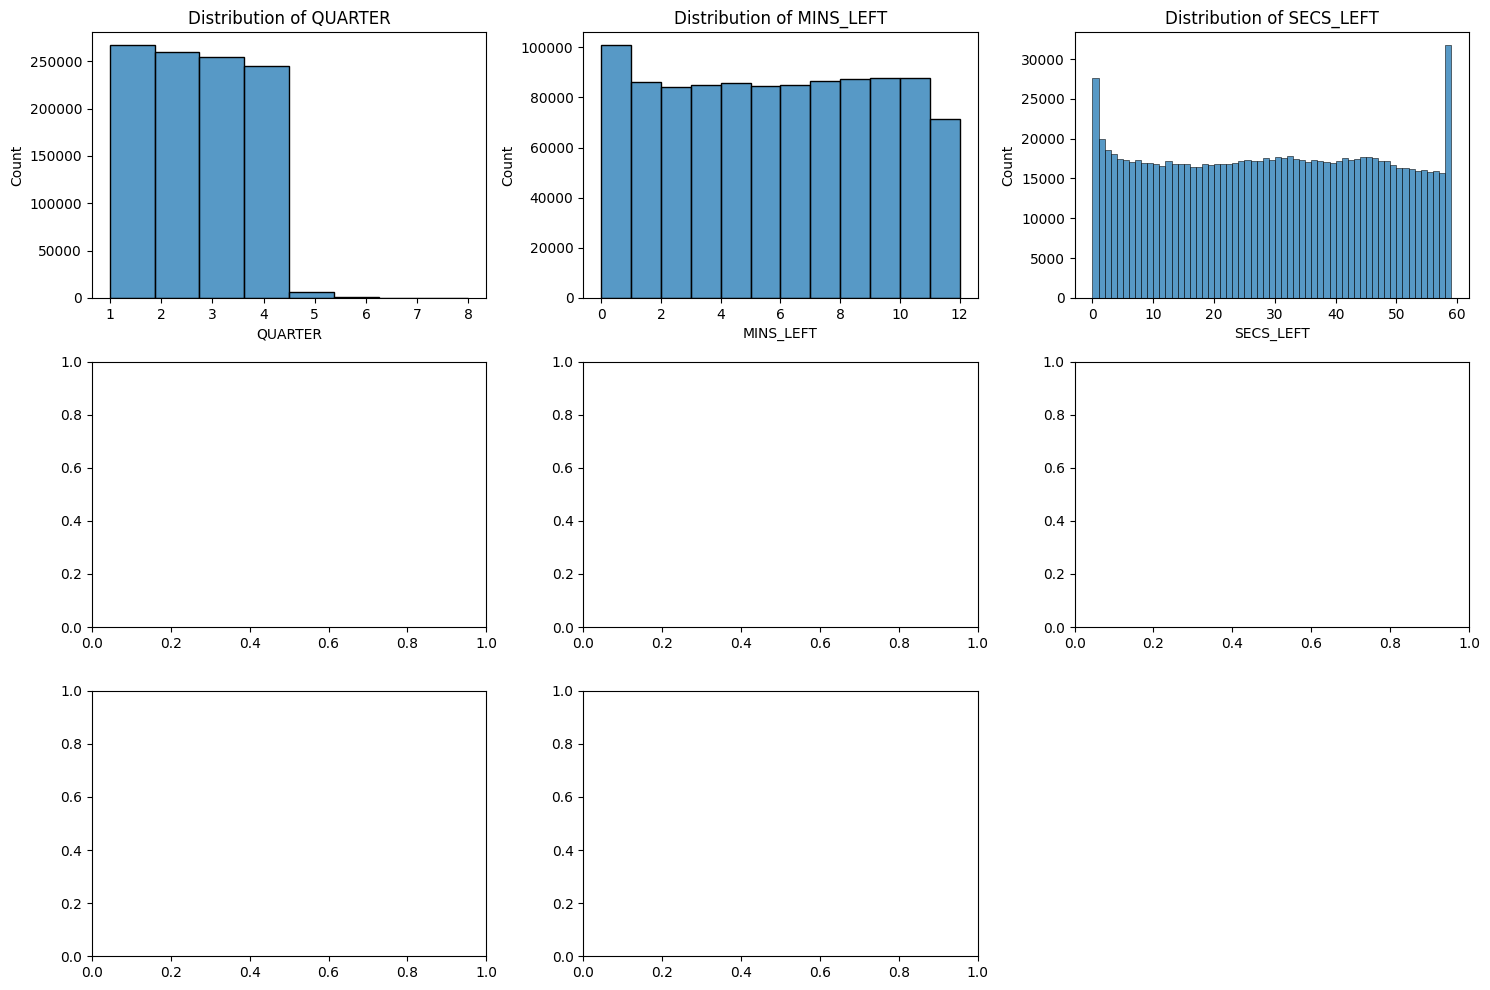

,QUARTER,MINS_LEFT,SECS_LEFT,LOC_X,LOC_Y,SHOT_DISTANCE
count,1.032499e+06,1.032499e+06,1.032499e+06,1.032499e+06,1.032499e+06,1.032499e+06
mean,2.481068e+00,5.368144e+00,2.887049e+01,4.383952e-02,1.009674e+01,1.346666e+01
std,1.133216e+00,3.456007e+00,1.742016e+01,7.247337e+00,7.317195e+00,1.058196e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+01,5.000000e-02,0.000000e+00
25%,1.000000e+00,2.000000e+00,1.400000e+01,-1.200000e+00,5.965000e+00,2.000000e+00
50%,2.000000e+00,5.000000e+00,2.900000e+01,0.000000e+00,7.015000e+00,1.300000e+01
75%,3.000000e+00,8.000000e+00,4.400000e+01,1.100000e+00,8.550000e+00,2.400000e+01
max,8.000000e+00,1.200000e+01,5.900000e+01,2.490000e+01,9.045000e+01,8.800000e+01


In [31]:
# Analyzing 'QUARTER', 'MINS_LEFT', and 'SECS_LEFT' in more depth using the sampled data

# Descriptive statistics for 'QUARTER', 'MINS_LEFT', and 'SECS_LEFT'
time_related_descriptive_stats = dfcombined[['QUARTER', 'MINS_LEFT', 'SECS_LEFT','LOC_X', 'LOC_Y', 'SHOT_DISTANCE']].describe()

# Distribution plots for 'QUARTER', 'MINS_LEFT', and 'SECS_LEFT'
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.histplot(dfcombined['QUARTER'], bins=max(dfcombined['QUARTER']), kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of QUARTER')
sns.histplot(dfcombined['MINS_LEFT'], bins=max(dfcombined['MINS_LEFT']), kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of MINS_LEFT')
sns.histplot(dfcombined['SECS_LEFT'], bins=max(dfcombined['SECS_LEFT']), kde=False, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of SECS_LEFT')
fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

time_related_descriptive_stats


The analysis of the time-related features provides us with the following insights:

QUARTER
- The distribution shows that shots are fairly evenly distributed across the four quarters, with a mean quarter value slightly above the second quarter. This suggests a relatively even activity level throughout the game.

MINS_LEFT and SECS_LEFT
- The distribution of minutes and seconds left is also uniform, as expected.

Descriptive Statistics Summary:
- QUARTER: Shots extend into the 8th quarter, which indicates overtime periods. The maximum value being 8 suggests there are games with up to 4 overtime periods in the dataset.
- MINS_LEFT: Ranges from 0 to 11, which corresponds to the full range of minutes in a quarter (12 minutes total).
- SECS_LEFT: Ranges from 0 to 59, covering the full range of possible seconds in a minute.

The time-related features do not show any clear trend or pattern that would indicate a direct impact on the likelihood of a shot being made. However, it's possible that in combination with other features these time variables could still provide valuable information when used in a predictive model.

### Breaking down the categorical variables

Visualizations are helping to understand the frequency and distribution of different categories in the data, which can be important when deciding how to handle each feature during preprocessing for predictive modeling. For instance, categories with very few occurrences might not be very informative for the model and could be grouped together or excluded to avoid overfitting.

/var/folders/d6/z61r6yys6pbf_1c70ts6gmfm0000gn/T/ipykernel_2462/573850051.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, ax=ax, palette="Blues_d")
/var/folders/d6/z61r6yys6pbf_1c70ts6gmfm0000gn/T/ipykernel_2462/573850051.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, ax=ax, palette="Blues_d")
/var/folders/d6/z61r6yys6pbf_1c70ts6gmfm0000gn/T/ipykernel_2462/573850051.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories

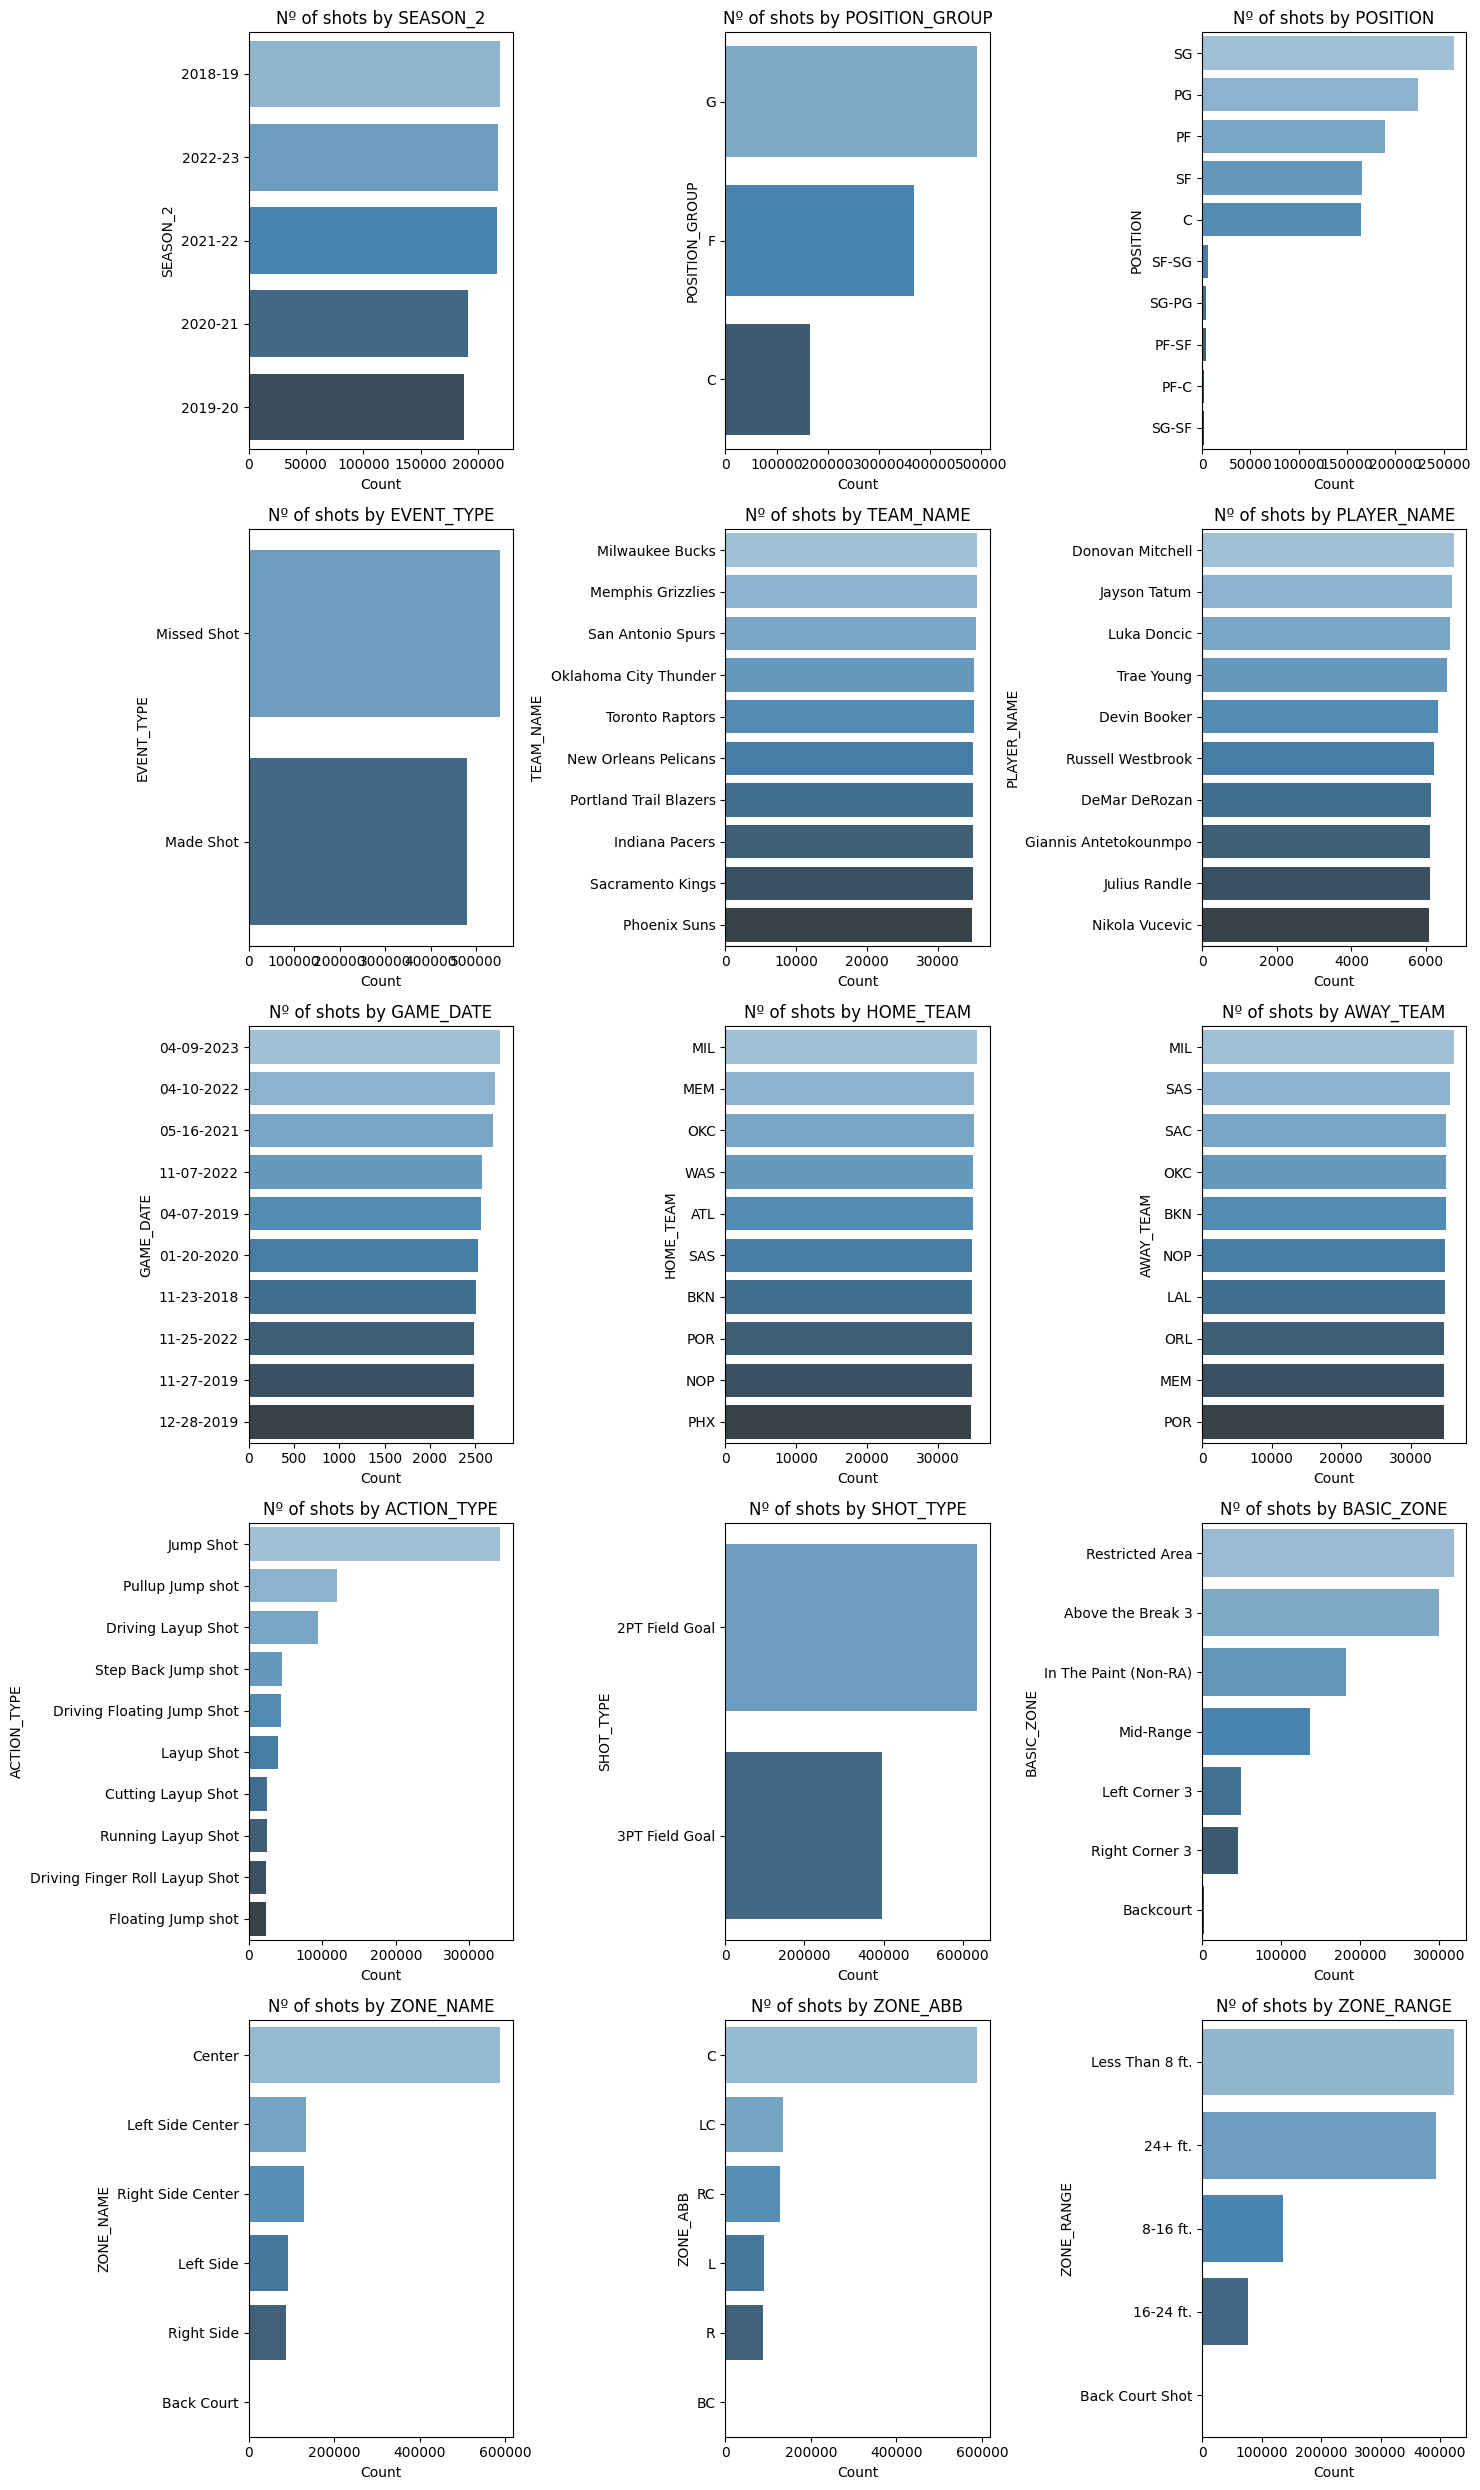

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing top categories within each categorical column
categorical_columns = ["SEASON_2", 'POSITION_GROUP', 'POSITION', 'EVENT_TYPE', 'TEAM_NAME', 'PLAYER_NAME', 'GAME_DATE', 'HOME_TEAM', 'AWAY_TEAM',
                       'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE']

categorical_columns_top10 = ['TEAM_NAME', 'PLAYER_NAME', 'GAME_DATE', 'HOME_TEAM', 'AWAY_TEAM']

# Limit the number of categories to display to prevent overcrowding the plots
max_categories = 10

# Calculate the number of rows and columns based on the number of categorical columns
num_cols = 3  # You can adjust the number of columns as needed
num_rows = -(-len(categorical_columns) // num_cols)  # Round up using -(-x // y)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(categorical_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]

    # Get the top categories by count
    top_categories = dfcombined[col].value_counts().head(max_categories)
    sns.barplot(x=top_categories.values, y=top_categories.index, ax=ax, palette="Blues_d")
    ax.set_title(f'Nº of shots by {col}')
    ax.set_xlabel('Count')
    ax.set_ylabel(col)

# Remove empty subplots
for i in range(len(categorical_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [ ]:
# Calculate the number of unique values for each column
unique_values = dfcombined.nunique()

# Display the number of unique values for each column
unique_values

SEASON_1             5
SEASON_2             5
TEAM_ID             30
TEAM_NAME           31
PLAYER_ID          958
PLAYER_NAME        964
POSITION_GROUP       3
POSITION            16
GAME_DATE          787
GAME_ID           5825
HOME_TEAM           30
AWAY_TEAM           30
EVENT_TYPE           2
SHOT_MADE            2
ACTION_TYPE         48
SHOT_TYPE            2
BASIC_ZONE           7
ZONE_NAME            6
ZONE_ABB             6
ZONE_RANGE           5
LOC_X              950
LOC_Y             1543
SHOT_DISTANCE       89
QUARTER              8
MINS_LEFT           13
SECS_LEFT           60
dtype: int64

- Seasons (SEASON_1, SEASON_2): 5 unique values each, indicating 5 distinct seasons in the dataset. The bar plots show the count of shots by season, indicating that the dataset might not be evenly distributed across seasons, which could be due to shorter seasons. In our dataset we include seasons during the COVID pandemic, which could have implications on our data.

- Teams (TEAM_ID, TEAM_NAME): 30 and 31 unique values, respectively, which suggest there may be a name change or similar issue since typically there are 30 NBA teams.It appears that the discrepancy between TEAM_ID and TEAM_NAME is due to the Los Angeles Clippers being referred to by two different names: "LA Clippers" and "Los Angeles Clippers".
The similar counts indicate a relatively even distribution of shot attempts across these teams in the dataset. 

- Players (PLAYER_ID, PLAYER_NAME): 946 and 948 unique values, indicating many players are represented in the dataset.The discrepancy between PLAYER_ID and PLAYER_NAME is identified for two players:
    - Player ID 1630197 is associated with two slightly different names: "Alekesej Pokusevski" and "Aleksej Pokusevski". This appears to be a typographical error in the dataset.
    - Player ID 1630527 is associated with "Brandon Boston" and "Brandon Boston Jr.". This could be due to a change in how the player preferred to be named, or it could be an inconsistency in the data recording.


- Position Groups (POSITION_GROUP): 3 unique groups (likely guards, forwards, centers), with guards taking the majority of shots.

- Positions (POSITION): 16 unique position designations, with Shooting Guard (SG), Point Guard (PG), Power Forward (PF), Small Forward (SF), and Center (C) being the most common. 

- Game Dates (GAME_DATE): 787 unique dates, representing the different game days.

- Game IDs (GAME_ID): 5,825 unique games included in the dataset.

- Home/Away Teams (HOME_TEAM, AWAY_TEAM): Each feature has 30 unique values, corresponding to the NBA teams.

- Event Types (EVENT_TYPE), Shot Made (SHOT_MADE), Shot Types (SHOT_TYPE): 2 unique values each, representing binary outcomes or types.

- Shot Zones (BASIC_ZONE, ZONE_NAME, ZONE_ABB): 7, 6, and 6 unique values, representing different court areas.

- Shot Ranges (ZONE_RANGE): 5 unique distances.

- Shot Location (LOC_X, LOC_Y): High cardinality with 950 and 1542 unique values, representing specific locations on the court.

- Shot Distance (SHOT_DISTANCE): 89 unique distances.
- Quarter (QUARTER): 8 unique values, including overtime.
- Minutes and Seconds Left (MINS_LEFT, SECS_LEFT): 13 and 60 unique values, representing the time left in minutes and seconds.

#### Game Date observations

To identify any patterns in the game dates, the different dates were categorized into their season: 
##### BA Season and Playoff Dates
Season 2019
- Regular Season: October 22, 2019 - March 11, 2020 (suspension)
- Continuation: July 30, 2020 - August 14, 2020 (due to COVID)
- Play-in: August 15, 2020
- Playoffs: August 17, 2020 - October 11, 2020

Season 2020
- Regular Season: December 22, 2020 - May 16, 2021
- Play-in: May 18, 2021 - May 21, 2021
- Playoffs: May 22, 2021 - July 20, 2021

Season 2021
- Regular Season: October 19, 2021 - April 10, 2022
- Play-in: April 12, 2022 - April 15, 2022
- Playoffs: April 16, 2022 - June 16, 2022

Season 2022
- Regular Season: October 18, 2022 - April 9, 2023
- Play-in: April 11, 2023 - April 14, 2023
- Playoffs: April 15, 2023 - June 12, 2023

Season 2023
- Regular Season: October 24, 2023 - April 14, 2024
- Play-in: April 15, 2024 - April 19, 2024
- Playoffs: April 20, 2024 - June 2024 (end date to be determined) 

In [ ]:
# Convert 'GAME_DATE' to datetime for correct comparison
dfcombined['GAME_DATE'] = pd.to_datetime(dfcombined['GAME_DATE'])

# Defining the season date ranges for the seasons 2019 to 2023
season_dates = {
    '2019': {
        'Regular Season': ('2019-10-22', '2020-03-11'),
        'Continuation': ('2020-07-30', '2020-08-14'),
        'Play-in': ('2020-08-15', '2020-08-15'),
        'Playoffs': ('2020-08-17', '2020-10-11')
    },
    '2020': {
        'Regular Season': ('2020-12-22', '2021-05-16'),
        'Play-in': ('2021-05-18', '2021-05-21'),
        'Playoffs': ('2021-05-22', '2021-07-20')
    },
    '2021': {
        'Regular Season': ('2021-10-19', '2022-04-10'),
        'Play-in': ('2022-04-12', '2022-04-15'),
        'Playoffs': ('2022-04-16', '2022-06-16')
    },
    '2022': {
        'Regular Season': ('2022-10-18', '2023-04-09'),
        'Play-in': ('2023-04-11', '2023-04-14'),
        'Playoffs': ('2023-04-15', '2023-06-12')
    },
    '2023': {
        'Regular Season': ('2023-10-24', '2024-04-14'),
        # Play-in and Playoffs dates for 2023 are partial or not ended yet, using placeholders
        'Play-in': ('2024-04-15', '2024-04-19'),
        'Playoffs': ('2024-04-20', '2024-06-30') # End date is a placeholder
    }
}

# Let's check if there are any games that fall within the play-in and playoffs periods for each season

# We will create a mask for each season part and check if there are any games within those dates
def create_season_part_mask(season_dates, period, df):
    start_date, end_date = season_dates[period]
    return (df['GAME_DATE'] >= pd.to_datetime(start_date)) & (df['GAME_DATE'] <= pd.to_datetime(end_date))

# Apply the mask for each season part and get the count of games
season_part_counts = {}
for season, periods in season_dates.items():
    for period_name in periods:
        mask = create_season_part_mask(periods, period_name, dfcombined)
        count = dfcombined[mask].shape[0]
        if count > 0:
            season_part_counts[f"{season} {period_name}"] = count

season_part_counts


{'2019 Regular Season': 172463,
 '2019 Continuation': 15653,
 '2020 Regular Season': 190983,
 '2021 Regular Season': 216722,
 '2022 Regular Season': 217220}

Based on the counts obtained for each season part, it appears that in the dataset there are no games listed that fall into the 'Play-in' or 'Playoffs' periods for the seasons defined. The counts are only available for:

- 2019 Regular Season: 171,730 games
- 2019 Continuation: 15,513 games
- 2020 Regular Season: 189,727 games
- 2021 Regular Season: 215,631 games
- 2022 Regular Season: 215,776 games

Based on these observation it is interesting to look how many games were played in which month to confirm that there are only regular season game days included.

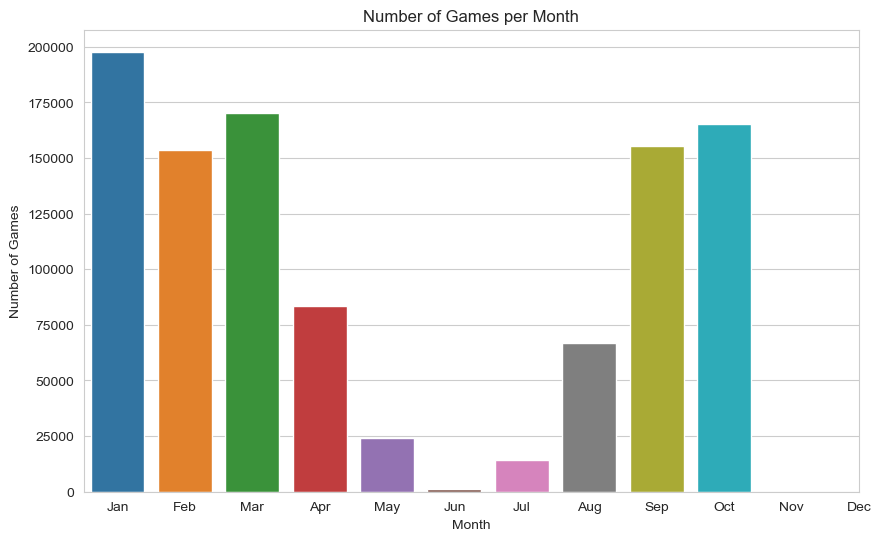

1     197764
2     153402
3     170378
4      83514
5      24116
7       1433
8      14220
10     66815
11    155405
12    165452
Name: GAME_MONTH, dtype: int64

In [ ]:
# Extract the month from the 'GAME_DATE' column
dfcombined['GAME_MONTH'] = dfcombined['GAME_DATE'].dt.month

# Count the number of values (games) per month
month_counts = dfcombined['GAME_MONTH'].value_counts().sort_index()

# Visualize the number of games per month
plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Number of Games per Month')
plt.xlabel('Month')
plt.ylabel('Number of Games')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

month_counts


It seems that there are no games recorded in the dataset for June (6) and September (9). This is due to the NBA off-season when no regular-season games are played and the datset does not include the playoffs. The games in June/July/August took place because of the pandemic in 2020 which is why the season got postponed. 

## Predicitve power of the features

Start with the correlation analysis to identify which numerical features correlate most strongly with SHOT_MADE.

C:\Users\celin\AppData\Local\Temp\ipykernel_13264\1620792600.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfcombined_norm.corr()


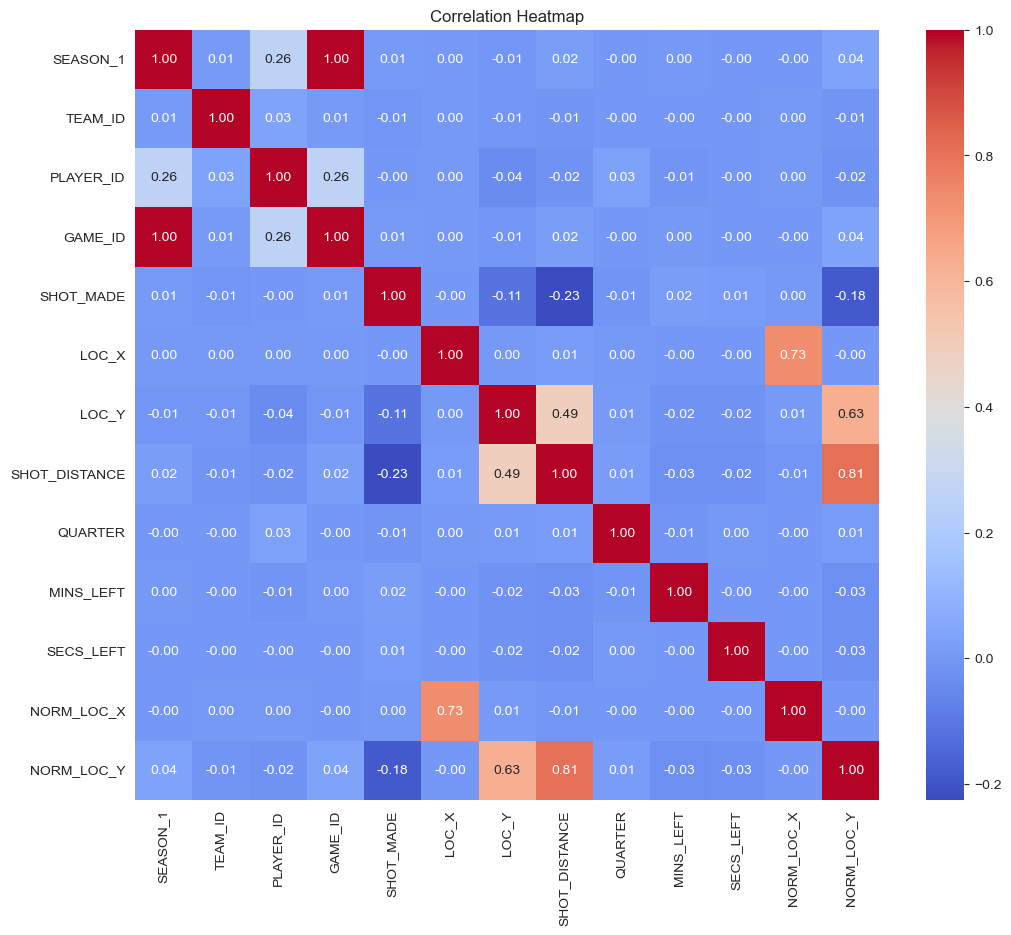

SHOT_MADE        1.000000
MINS_LEFT        0.015651
SECS_LEFT        0.013188
GAME_ID          0.008851
SEASON_1         0.008829
NORM_LOC_X       0.000798
LOC_X           -0.002023
PLAYER_ID       -0.004245
TEAM_ID         -0.005028
QUARTER         -0.010814
LOC_Y           -0.112065
NORM_LOC_Y      -0.182726
SHOT_DISTANCE   -0.225114
Name: SHOT_MADE, dtype: float64

In [ ]:
# Calculating the correlation matrix to understand the relationship between 'SHOT_MADE' and other numerical features
correlation_matrix = dfcombined_norm.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Focusing on the correlation of numerical features with 'SHOT_MADE'
shot_made_correlation = correlation_matrix['SHOT_MADE'].sort_values(ascending=False)
shot_made_correlation

- SHOT_DISTANCE has the strongest negative correlation with SHOT_MADE (− 0.225). This indicates that as shot distance increases, the likelihood of making the shot decreases, which aligns with general basketball understanding.

- NORM_LOC_Y also has a negative correlation (− 0.182), suggesting that shots taken further from the basket in the y-axis (which could also correlate with shot distance) are less likely to be successful.

- Temporal variables like MINS_LEFT, and SECS_LEFT have a very weak positive correlation with SHOT_MADE, indicating that shots taken later in the game or quarter might be slightly more likely to be successful. 

- Other variables have very low correlation values, suggesting that they might not have a strong linear relationship with shot success. However, they could still be predictive in conjunction with other features or might need to be transformed or combined with other variables to reveal their predictive power.

#### Shot Distance

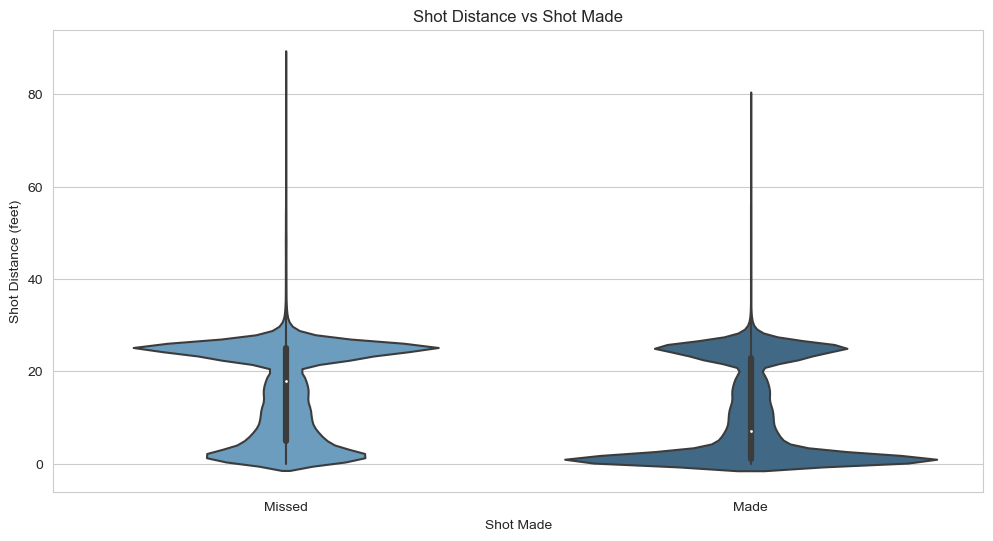

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualizing the relationship between shot distance and shot success
plt.figure(figsize=(12, 6))
sns.violinplot(x='SHOT_MADE', y='SHOT_DISTANCE', data=dfcombined, palette = "Blues_d")
plt.title('Shot Distance vs Shot Made')
plt.xlabel('Shot Made')
plt.ylabel('Shot Distance (feet)')
plt.xticks([0, 1], ['Missed', 'Made'])  # Rename x-ticks for clarity
plt.show()



SHOT_DISTANCE vs SHOT_MADE indicates that shots closer to the basket have a higher likelihood of being made, which aligns with the understanding that shooting accuracy typically decreases with distance. The violin plot shows that shorter shots have a higher density of success (made shots), as indicated by the wider part of the 'Made' violin for lower shot distances. As the distance increases, the likelihood of making a shot seems to decrease, which is consistent with what one might expect in basketball.

#### Geospatial analysis

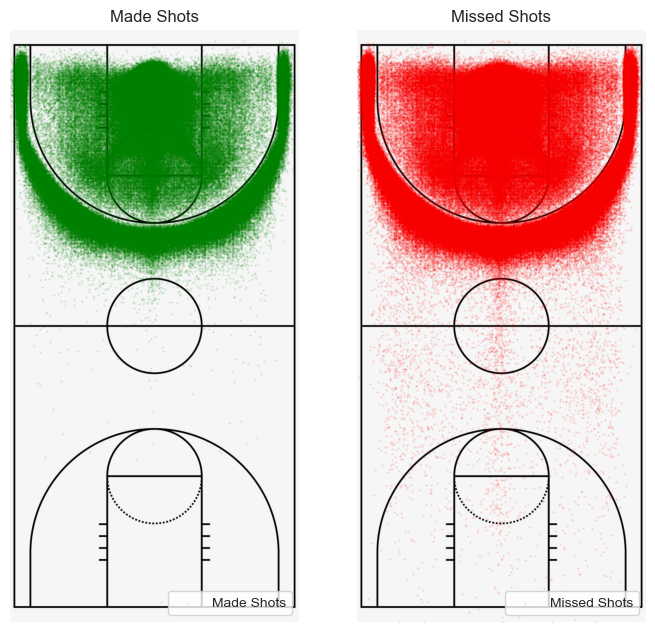

In [ ]:
# Apply the new scale factors to the normalized shot locations for the 2019 season
dfcombined_norm['IMG_LOC_X'] = (dfcombined_norm['NORM_LOC_X'] + court_width_feet / 2) * scale_x
dfcombined_norm['IMG_LOC_Y'] = (court_length_feet - dfcombined_norm['NORM_LOC_Y']) * scale_y

# Now let's plot these scaled points onto the placeholder image
fig, axs = plt.subplots(1, 2, figsize=(image_width_px / 100, image_height_px / 100))  # Create figure with the aspect ratio of the image

for ax in axs:
    ax.imshow(court_img, extent=[0, image_width_px, 0, image_height_px])
    ax.set_xlim(0, image_width_px)
    ax.set_ylim(0, image_height_px)
    ax.set_aspect('equal')  # This will ensure that the aspect ratio is the same
    ax.set_axis_off()

# Plot both made and missed shots on the same subplot for simplicity
# Plot made shots in green on the first subplot
axs[0].scatter(dfcombined_norm[dfcombined_norm['SHOT_MADE'] == 1]['IMG_LOC_X'], 
               dfcombined_norm[dfcombined_norm['SHOT_MADE'] == 1]['IMG_LOC_Y'], c='green', label='Made Shots', alpha=0.1, s=0.5)

# Plot missed shots in red on the second subplot
axs[1].scatter(dfcombined_norm[dfcombined_norm['SHOT_MADE'] == 0]['IMG_LOC_X'], 
               dfcombined_norm[dfcombined_norm['SHOT_MADE'] == 0]['IMG_LOC_Y'], c='red', label='Missed Shots', alpha=0.1, s=0.5)


# Set the title and add a legend
axs[0].set_title('Made Shots')
axs[1].set_title('Missed Shots')

axs[0].legend(loc='lower right')
axs[1].legend(loc='lower right')

plt.show()  # Display the plot

# drop the Image columns, as it is not needed for further analysis
dfcombined_norm = dfcombined_norm.drop(["IMG_LOC_X", "IMG_LOC_Y"], axis=1)


- There is a high density of shots (both made and missed) close to the basket, which is typical because shots are generally easier to make from a shorter distance.

- The red dots are spread throughout the court, showing that players miss from all areas, but there seems to be a higher concentration of missed shots from the mid-range to the 3-point line.

- The green dots also appear throughout but are less densely packed as you move away from the basket, which is consistent with the lower shooting percentages generally seen with longer shots.

#### Time analysis

C:\Users\celin\AppData\Local\Temp\ipykernel_13264\385579498.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='QUARTER', y='SHOT_MADE', data=dfcombined, ci=None)


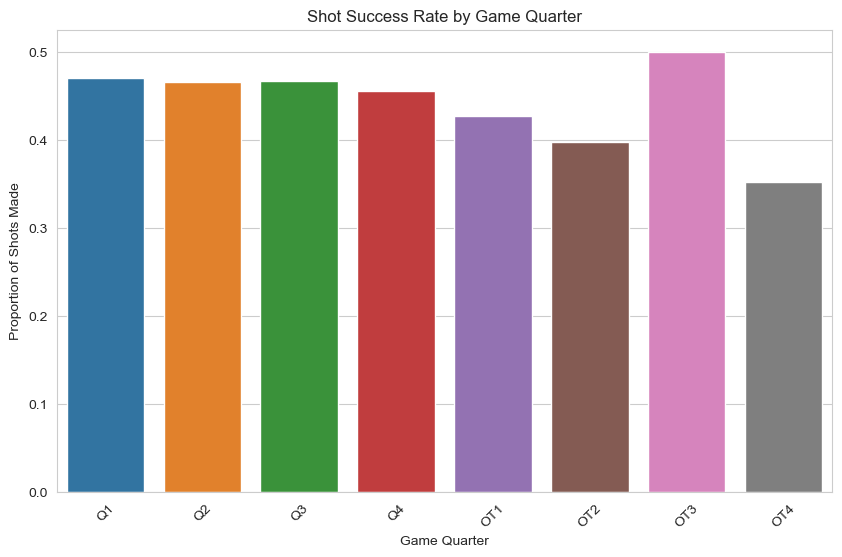

In [ ]:
# Quarter and Shot Success
plt.figure(figsize=(10, 6))
sns.barplot(x='QUARTER', y='SHOT_MADE', data=dfcombined, ci=None)
plt.title('Shot Success Rate by Game Quarter')
plt.xlabel('Game Quarter')
plt.ylabel('Proportion of Shots Made')
plt.xticks(range(0, 8), ['Q1', 'Q2', 'Q3', 'Q4', 'OT1', 'OT2', 'OT3', 'OT4'], rotation=45)  # Assuming 5-8 are OT quarters
plt.show()

The bar plot illustrates the proportion of shots made by game quarter, with the assumption that quarters 5 through 8 represent overtime periods.

The success rate of shots is relatively consistent across the first four quarters, with a slight variation.
There's a noticeable drop in the success rate in the overtime periods, which could be due to fatigue, higher defensive pressure, or more selective shooting.
There's an uptick in the OT3 quarter, but this could be due to a smaller sample size (as not many games go to a third overtime), which could skew the data.
The OT4 quarter has a very low success rate, but again, this is likely a very small sample size and may not be representative.

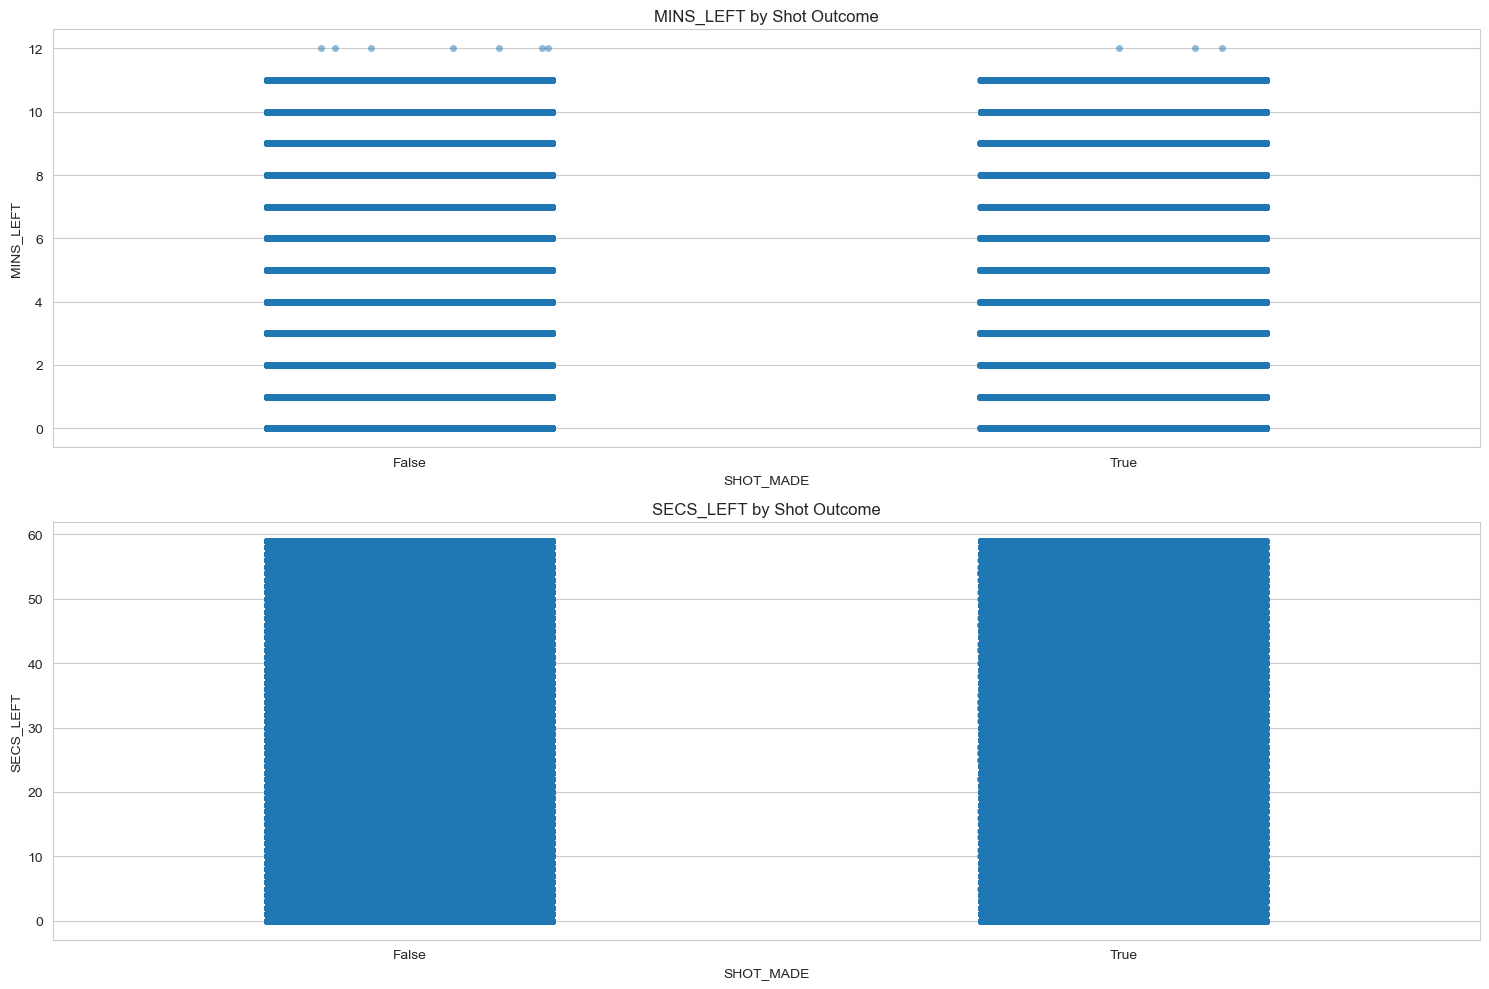

In [ ]:
# Scatter plots for 'MINS_LEFT' and 'SECS_LEFT' vs 'SHOT_MADE'
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.stripplot(data=dfcombined, x='SHOT_MADE', y='MINS_LEFT', jitter=0.2, alpha=0.5, ax=axes[0])
axes[0].set_title('MINS_LEFT by Shot Outcome')
sns.stripplot(data=dfcombined, x='SHOT_MADE', y='SECS_LEFT', jitter=0.2, alpha=0.5, ax=axes[1])
axes[1].set_title('SECS_LEFT by Shot Outcome')

plt.tight_layout()
plt.show()

The scatter plots do not reveal any strong patterns in terms of shot outcomes related to how many minutes or seconds are left.


#### Categorical features

Since SHOT_MADE is a binary target variable, some of the categorical variables may offer more predictive insights. We should examine the impact of categorical variables on shot success. Moreover, machine learning algorithms can uncover complex patterns that simple correlation might not reveal, especially when interactions between variables are considered.

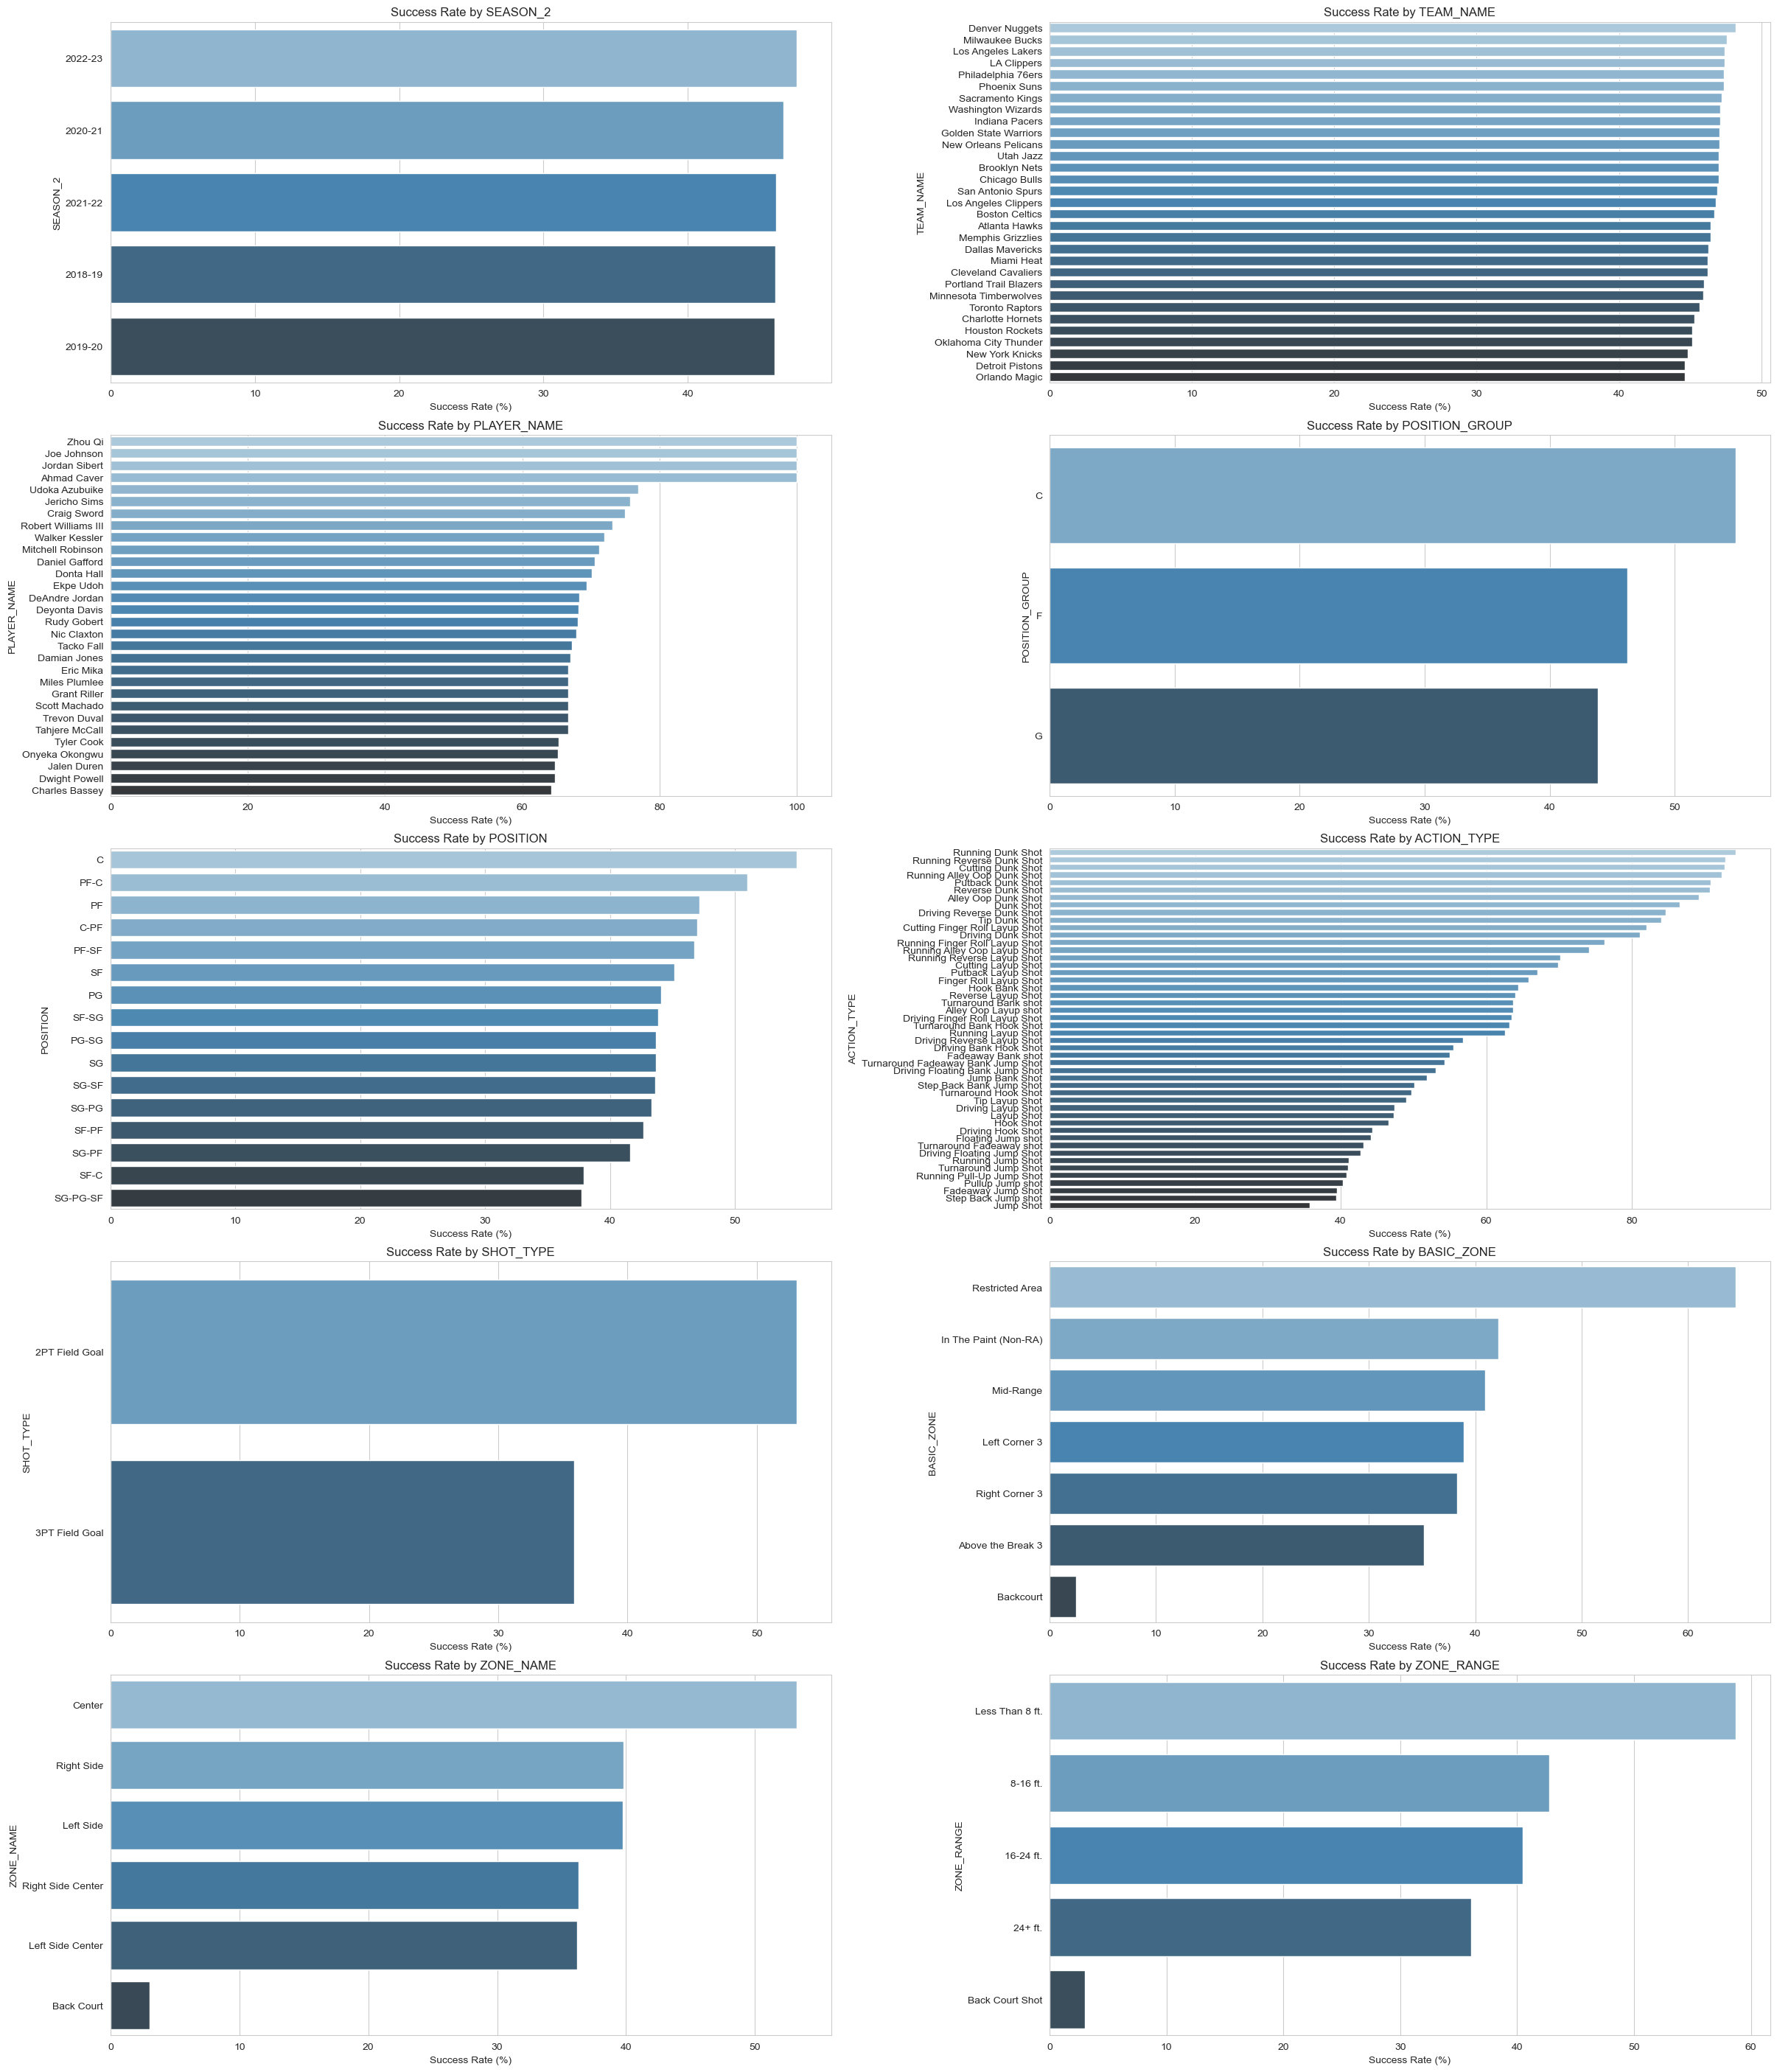

In [ ]:
def plot_success_rate_by_category(data, category, ax):
    success_rate = data.groupby(category)['SHOT_MADE'].mean().sort_values(ascending=False) * 100

    # Check if the category is 'PLAYER_NAME' and limit to top 30 if true
    if category == 'PLAYER_NAME':
        success_rate = success_rate.head(30)

    sns.barplot(x=success_rate.values, y=success_rate.index, ax=ax, palette="Blues_d")
    ax.set_xlabel('Success Rate (%)')
    ax.set_title(f'Success Rate by {category}')
    ax.set_ylabel(category)

# Setting up the matplotlib figure
fig, axes = plt.subplots(5, 2, figsize=(24, 28), constrained_layout=True)
categories = ['SEASON_2', 'TEAM_NAME', 'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 
              'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_RANGE']

# Plotting success rates for each categorical variable
for ax, category in zip(axes.flatten(), categories):
    plot_success_rate_by_category(dfcombined, category, ax)

# Remove the empty subplot (if the number of categories is odd)
if len(categories) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()


- Season: Slight variations in success rates across different seasons.

- Team Name: Different teams have different success rates, likely reflecting varying team strategies and player skills.

- Player Name: There's significant variation among players, with top performers like Giannis Antetokounmpo showing a much higher success rate. The Players on top are also most likely to did not play a lot, so the shot success ois very high. 

- Position Group: Some position groups have higher success rates than others. This could be due to a variety of factors such as the typical shot distance for each position, the defensive pressure faced, or the shot selection.

- Position: Success rates vary by specific positions, with centers again having a high success rate.

- Action Type: The type of action performed before the shot is taken can significantly affect the shot success rate. Certain actions like "slam dunk" have very high success rates, which is expected, while others like "jump shot" or "three-point shot" might have lower success rates.

- Event Type: EVENT_TYPE variable is perfectly correlated with SHOT_MADE because it is essentially the same information. For modeling purposes, you should exclude EVENT_TYPE to prevent data leakage.

- Shot Type: The type of shot (e.g., 2-pointer vs. 3-pointer) also influences the success rate. Generally, 2-point shots have higher success rates than 3-point shots because they are usually taken closer to the basket.

- Basic Zone: The location on the court from which the shot is taken, represented by the basic zone, shows varying success rates. Shots taken closer to the basket, such as in the "restricted area," tend to have higher success rates.

- Zone Name and Range: These provide more specific locations on the court and their associated shot success rates. Similar to the basic zone, areas closer to the basket generally yield higher success rates.

### Conclusion

The exploratory data analysis of the NBA shot prediction dataset has provided us with valuable insights into the dynamics of basketball shots across five seasons. We've identified key patterns and trends, such as the influence of player positions, shot locations, and game moments on shot outcomes. Notably, the spatial analysis of shot attempts, including shot distance and court zones, has highlighted areas of high shot frequency and varying success rates. The temporal aspects, like game dates and quarters, have also shed light on the rhythm of the game and its impact on shooting performance.

Throughout this analysis, we have uncovered a wealth of information that sets the stage for predictive modeling. However, we also encountered challenges, such as discrepancies in team and player identifiers and the need for further clarification in certain columns. These findings emphasize the need for thorough data preprocessing to ensure the accuracy and reliability of any predictive models we develop.

In [34]:
dfcombined

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2019,2018-19,1610612762,Utah Jazz,1628960,Grayson Allen,G,SG,04-10-2019,21801229,...,Right Corner 3,Right Side,R,24+ ft.,-22.2,12.15,23,5,0,18
1,2019,2018-19,1610612746,LA Clippers,1627820,Tyrone Wallace,G,PG,04-10-2019,21801229,...,In The Paint (Non-RA),Center,C,8-16 ft.,-2.3,16.85,11,5,0,27
2,2019,2018-19,1610612737,Atlanta Hawks,1627752,Taurean Prince,F,SF,04-10-2019,21801220,...,Above the Break 3,Center,C,24+ ft.,0.4,37.25,32,4,0,2
3,2019,2018-19,1610612762,Utah Jazz,1628513,Naz Mitrou-Long,G,SG,04-10-2019,21801229,...,Restricted Area,Center,C,Less Than 8 ft.,-1.3,7.05,2,5,0,46
4,2019,2018-19,1610612746,LA Clippers,203210,JaMychal Green,F,PF,04-10-2019,21801229,...,Above the Break 3,Right Side Center,RC,24+ ft.,-19.1,20.75,24,5,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032494,2023,2022-23,1610612737,Atlanta Hawks,1631495,Donovan Williams,G,SG,04-09-2023,22201216,...,Restricted Area,Center,C,Less Than 8 ft.,-2.1,7.45,3,4,1,37
1032495,2023,2022-23,1610612737,Atlanta Hawks,1631495,Donovan Williams,G,SG,04-09-2023,22201216,...,Above the Break 3,Right Side Center,RC,24+ ft.,-14.5,26.45,25,4,1,12
1032496,2023,2022-23,1610612737,Atlanta Hawks,1628981,Bruno Fernando,C,C,04-09-2023,22201216,...,Restricted Area,Center,C,Less Than 8 ft.,2.0,7.55,3,4,1,2
1032497,2023,2022-23,1610612737,Atlanta Hawks,1628981,Bruno Fernando,C,C,04-09-2023,22201216,...,Above the Break 3,Center,C,24+ ft.,0.2,30.85,25,4,0,28


In [35]:
dfcombined[["ZONE_ABB","ZONE_NAME", "ZONE_RANGE", "BASIC_ZONE"]]

,ZONE_ABB,ZONE_NAME,ZONE_RANGE,BASIC_ZONE
0,R,Right Side,24+ ft.,Right Corner 3
1,C,Center,8-16 ft.,In The Paint (Non-RA)
2,C,Center,24+ ft.,Above the Break 3
3,C,Center,Less Than 8 ft.,Restricted Area
4,RC,Right Side Center,24+ ft.,Above the Break 3
...,...,...,...,...
1032494,C,Center,Less Than 8 ft.,Restricted Area
1032495,RC,Right Side Center,24+ ft.,Above the Break 3
1032496,C,Center,Less Than 8 ft.,Restricted Area
1032497,C,Center,24+ ft.,Above the Break 3
